In [12]:
import nltk
import random

In [13]:
from nltk.corpus import names

In [14]:
names.fileids()

[u'female.txt', u'male.txt']

In [15]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use("ggplot")
%matplotlib inline

In [16]:
name_cfd = nltk.ConditionalFreqDist((fileid,name[-2:]) for fileid in names.fileids() for name in names.words(fileid))

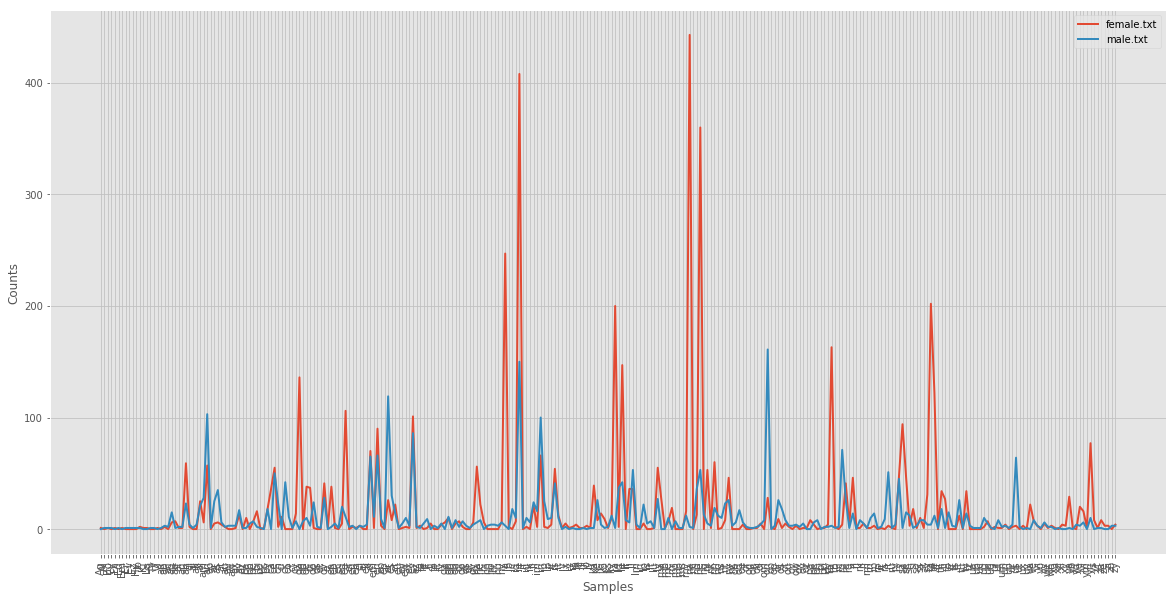

In [17]:
plt.figure(figsize=(20,10))
name_cfd.plot()

In [20]:
def name_features(name):
    return {"pair": name[-2:]}

In [21]:
name_features("Katy")

{'pair': 'ty'}

In [22]:
name_list = [(name, "male") for name in names.words("male.txt")] + [(name, "female") for name in names.words("female.txt")]

In [23]:
name_list[:5]

[(u'Aamir', 'male'),
 (u'Aaron', 'male'),
 (u'Abbey', 'male'),
 (u'Abbie', 'male'),
 (u'Abbot', 'male')]

In [24]:
name_list[-5:]

[(u'Zorine', 'female'),
 (u'Zsa Zsa', 'female'),
 (u'Zsazsa', 'female'),
 (u'Zulema', 'female'),
 (u'Zuzana', 'female')]

In [25]:
random.shuffle(name_list)

In [26]:
name_list[:5]

[(u'Slim', 'male'),
 (u'Sidonia', 'female'),
 (u'Bryna', 'female'),
 (u'Zara', 'female'),
 (u'Neville', 'male')]

In [27]:
features = [ (name_features(name), gender) for (name, gender) in name_list]

In [28]:
features[:10]

[({'pair': u'im'}, 'male'),
 ({'pair': u'ia'}, 'female'),
 ({'pair': u'na'}, 'female'),
 ({'pair': u'ra'}, 'female'),
 ({'pair': u'le'}, 'male'),
 ({'pair': u'de'}, 'female'),
 ({'pair': u'ie'}, 'female'),
 ({'pair': u'am'}, 'male'),
 ({'pair': u'rd'}, 'male'),
 ({'pair': u'ra'}, 'female')]

In [33]:
training_set = features[:len(features)/2]
testing_set = features[len(features)/2:]

In [34]:
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [35]:
male_names = names.words("male.txt")

In [38]:
"Mardonio" in male_names

False

In [48]:
classifier.classify(name_features("Mardonio"))

'male'

In [49]:
nltk.classify.accuracy(classifier, testing_set)

0.7862537764350453